In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

### Navier Stokes

Gustavo Mejía 201922661;
Diego Virgez 201923829

#### 1. Over-relaxation

In [78]:
Min, Max, N = 0.,40.,51
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [79]:
def h1(y):
    return 100.
def h2(y):
    return 50.
def h3(x):
    return 10.
def h4(x):
    return 0.

In [80]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [81]:
def GetRelaxation(T, Nit = int(1e5), omega = 1, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(T)
        #print(it)
        
        if np.abs(dmax) < tolerancia:
            #print(it)
            itmax = it
            break
       
    return T,it

In [82]:
T = InitT()
#Tf1,ite =  GetRelaxation(T)

In [83]:
def Get_iterations(w):

    iteraciones = []

    for i in (w):
        T = InitT()
        _,ite =  GetRelaxation(T, int(1e5), i)
        iteraciones.append(ite)
    
    return iteraciones

In [84]:
o = np.linspace(1,1.9,5)
w = np.array([1., 1.2])
iterations = Get_iterations(w)

  1%|          | 612/100000 [00:04<10:52, 152.31it/s]


<IPython.core.display.Javascript object>


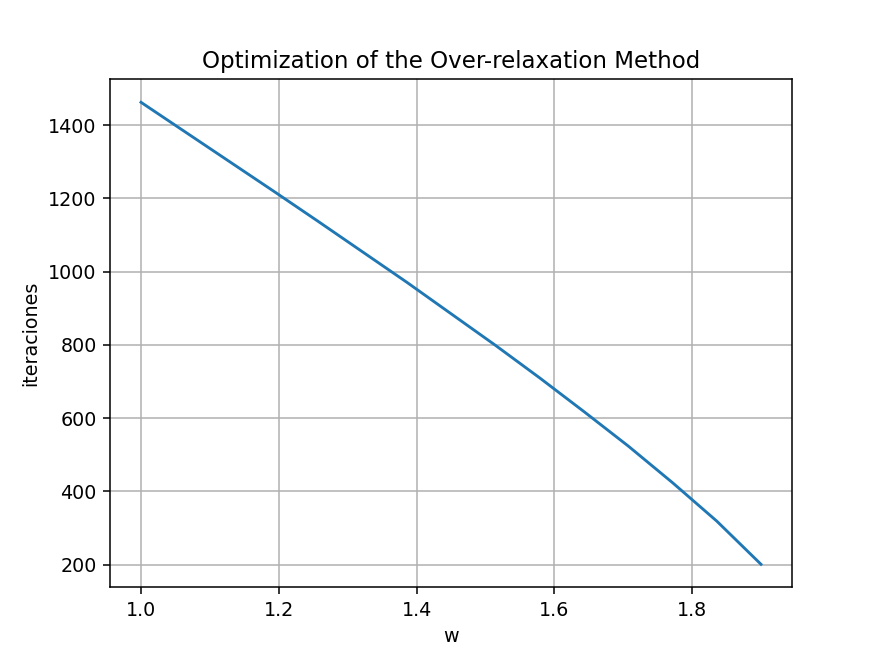

In [40]:
plt.plot(o,iterations)
plt.title("Optimization of the Over-relaxation Method")
plt.xlabel("w")
plt.ylabel("iteraciones")
plt.grid()

Si el parámetro $w$ es mayor o igual a dos, entonces el metodo de relajación empieza a mostrar problemas de convergencia y luego ya no converge.

#### 2. Navier-Stokes

In [34]:
      
def Navier(Nit,w,tol,Nxmin,Nxmax,Nymin,Nymax,vo,h,nu,N):
    
    U = np.zeros((N,N))
    W = np.zeros((N,N))
    x = np.linspace(0,1,N)
    y = np.linspace(0,1,N)
    X,Y = np.meshgrid(x,y)
    R = (v0*h)/nu
    m1 = 0
    m2 = 0
    lx = len(x)
    ly = len(y)
    
    for it in range(Nit):
        
        for i in range(Nxmin,Nxmax+1):
            W[i,0]= -2*(U[i,1] - U[i,0])/(h**2) 
            W[i,-1] = -2*(U[i,-2] - U[i,-1])/(h**2) 
            
        for j in range(N-Nymax,N-Nymin+1):
            W[0,j]= -2*(U[1,j] - U[0,j])/(h**2) 
            W[-1,j] = -2*(U[-2,j] - U[-1,j])/(h**2)
            
        for i in range(lx):
            U[-1,i] = U[-2,i] + v0*h*y[-1] 
            U[0,i] = U[1,i]
            U[i,0] = U[i,1]
            U[i,-1] = U[i,-2]
            
        for i in range(Nymin,Nymax+1):
            for j in range(Nxmin,Nxmax+1):
                U[Nxmin,j]=0
                U[Nxmax,j] = 0
                U[i,Nymin]=0 
                U[i,Nymax] = 0
        
        for i in range(1,lx-1):
            for j in range(1,ly-1):
                
                if (Nymax +1>i > Nymin+1) and (Nxmax +1> j > Nxmin+1):
                    U[i,j] = 0
                    W[i,j] = 0
                    
                else:
                    u = (1/4)*(U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1] + W[i,j]*h**2)
                    q = w*(u - U[i,j])
                    U[i,j]+=q
                    
                    if np.abs(q) > m1:
                        m1 = q
                
                if (Nxmax +1>i > Nxmin+1) and (Nymax +1> j > Nymin+1):
                    U[i,j] = 0
                    W[i,j] = 0
                    
                else:
                    w1 = (1/4)*(W[i,j+1]+W[i,j-1]+W[i-1,j]+W[i+1,j])
                    w2 = -(R/16)*(U[i,j+1]-U[i,j-1])*(W[i+1,j]-W[i-1,j])
                    w3 = (R/16)*(W[i,j+1]-W[i,j-1])*(U[i+1,j]-U[i-1,j])
                    
                    k = w*(w1+w2+w3-W[i,j])
                    W[i,j] += k
                    
                    if np.abs(k) > m2:
                        m2 = k
                
        if (np.abs(m1) < tol) and (np.abs(m2) < tol):
            break

Navier(10000,0.1,1e-5,5,25,5,30,1,0.02,0.2,51)

<IPython.core.display.Javascript object>


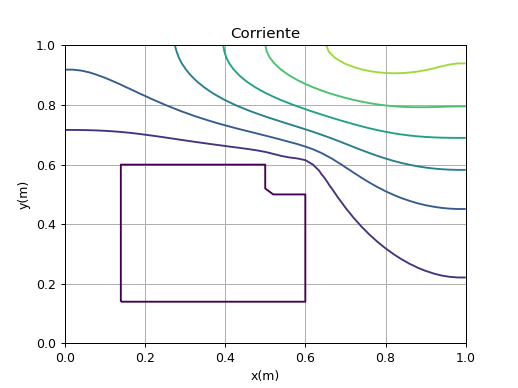

In [43]:
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
plt.title("Corriente")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.grid()
plt.contour(X,Y,U)

<IPython.core.display.Javascript object>


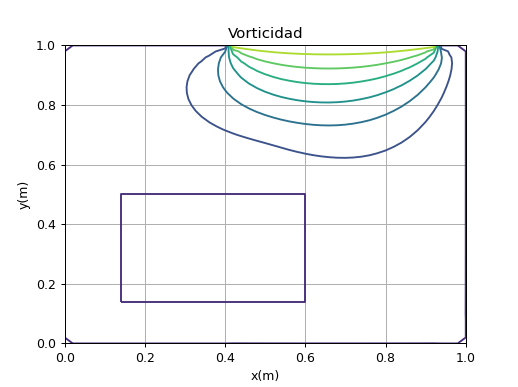

In [44]:

plt.title("Vorticidad")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.grid()
plt.contour(X,Y,W)

<IPython.core.display.Javascript object>


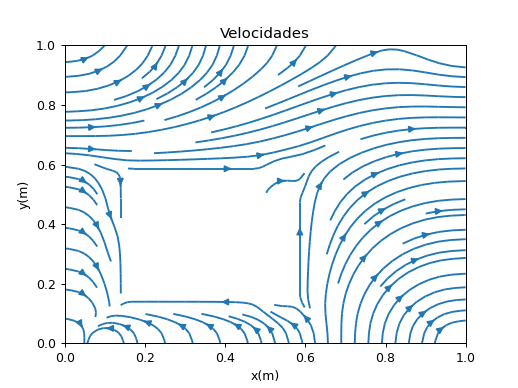

In [45]:
vx = np.zeros((51,51))
vy = np.zeros((51,51))


for i in range(1,50):
    for j in range(1,50):
        vx[i,j] = (U[i+1,j]-U[i-1,j])/(2*h)
        vy[i,j] = (U[i,j+1]-U[i,j-1])/(2*h)
        
plt.title("Velocidades")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.streamplot(X,Y,vx,vy)
